# Week 4

Topics we'll be exploring

- Machine Learning with scikit
- More visualizations


## Machine Learning Basics

Don't let the impressive name fool you. Machine learning is more or less the following steps

1. Getting your data and cleaning it up
1. Identify what parts of your data are **features**
1. Identify what is your **target variable** that you'll guess based on your features
1. Split your data in **training and testing sets**
1. **Train** your model against the training set
1. **Validate** your model against the testing set
1. ????
1. Profit


We are going to use the Python library [scikit-learn](https://scikit-learn.org/stable/) and we are going to be doing a [classification](https://en.wikipedia.org/wiki/Statistical_classification) problem.

![classification](https://raw.githubusercontent.com/BrockDSL/Machine_Learning_with_Python/master/classification.png)


## Decision Tree

This is one of the most basic machine learning model you can use. It is considered a [supervised learning](https://en.wikipedia.org/wiki/Supervised_learning) method. You create the best [decision tree](https://en.wikipedia.org/wiki/Decision_tree_learning) that you can based on your training data. Here's an example tree that shows your chance of surviving the Titanic disaster. What we are creating is series of question that when answered will put observations into a _bucket_ or in other terms one of the classification options. We also devise a probability associated with an observation falling into that _bucket_.

The features are described by the labels, however ``sibsp`` - is the number of spouses or siblings on board.

![dtree](https://upload.wikimedia.org/wikipedia/commons/e/eb/Decision_Tree.jpg)


So in this tree the most important question to ask first is what is the gender of the person you are considering, then next most important question is age above 9 and a half, followed lastly by, does this person have less than three spouses or siblings on board.

In [243]:
#This should look familar
import pandas
import numpy

#We'll draw a graph later on
import matplotlib.pyplot as plt

#Our 'Machine Learning pieces'
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn import tree

In [244]:
data = pandas.read_csv("week_4_san_francisco_workalong.csv")
data

,Patron Type Definition,Total Checkouts,Total Renewals,Circulation Active Year
0,1,28,13,2012
1,1,21,10,2015
2,1,275,559,2015
3,1,73,38,2016
4,1,182,90,2016
...,...,...,...,...
423443,1,170,12,2014
423444,2,4,0,2015
423445,1,4,1,2014
423446,1,30,4,2016


In [245]:
#What categories are we looking at
data["Patron Type Definition"].value_counts()


1    313870
2     88024
0     21554
Name: Patron Type Definition, dtype: int64

In [247]:
features = ["Total Checkouts", "Total Renewals", "Circulation Active Year"]
target = data["Patron Type Definition"]

X = data[features]
y = target


In [248]:
#We'll start with 30 just for fun
test_percent = 20

X_train, X_test, y_train, y_test = train_test_split(X, \
                                                    y, \
                                                    test_size=test_percent/100.0,
                                                   random_state=10)
# Create Decision Tree classifer object
treeClass = DecisionTreeClassifier()

# Train
treeClass = treeClass.fit(X_train,y_train)

#Predict
y_pred = treeClass.predict(X_test)

#Accuracy?
metrics.accuracy_score(y_test,y_pred)

0.7112528043452592

In [249]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.01      0.00      0.00      4267
           1       0.76      0.91      0.82     62784
           2       0.37      0.19      0.25     17639

    accuracy                           0.71     84690
   macro avg       0.38      0.37      0.36     84690
weighted avg       0.64      0.71      0.66     84690



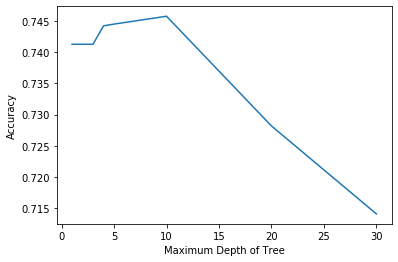

In [251]:
test_percent = 30
max_options = [1,2,3,4,5,10,20,30]

accuracy = []
tree_max = []

for max_d in max_options:
    X_train, X_test, y_train, y_test = train_test_split(X, \
                                                        y, \
                                                        test_size=test_percent/100.0,
                                                        random_state=10,
                                                       )
    
    #We set maximum depth in the DecisionTreeClassifer when we first create the variable
    treeClassTest = DecisionTreeClassifier(max_depth=max_d)
    treeClassTest = treeClassTest.fit(X_train,y_train)
    y_pred = treeClassTest.predict(X_test)
    score = metrics.accuracy_score(y_test,y_pred)
    accuracy.append(score)
    tree_max.append(max_d)

    
plt.plot(max_options,accuracy)
plt.ylabel("Accuracy")
plt.xlabel("Maximum Depth of Tree")
plt.show()

# Making Predictions

In [260]:
guess = [50,100,2018]

dp = pandas.DataFrame([guess],columns=X_test.columns)
treeClass.predict_proba(dp)

array([[0., 1., 0.]])

# RandomForest 

## Lots of decision trees

In [268]:
from sklearn.ensemble import RandomForestClassifier




test_percent = 20

X_train, X_test, y_train, y_test = train_test_split(X, \
                                                    y, \
                                                    test_size=test_percent/100.0,
                                                   random_state=10)

#Create Random Classifier
clf = RandomForestClassifier(n_estimators=5, random_state=0)

#Train
clf.fit(X_train,y_train)

#Predict
y_pred = clf.predict(X_train)

#Accuracy
metrics.accuracy_score(y_train,y_pred)

0.8004357092673826

In [270]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

ValueError: Found input variables with inconsistent numbers of samples: [84690, 338758]